# PEOPLE CHARM CASE
‘People Charm’, a growing company is facing a high attrition rate among their employees which in turn affects their business due to lack of expertise and experience. Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about to churn out. They need to recommend special plans or strategies which will help them to retain their employees which in turn will help them to grow bigger as a company. 

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#IMPORTING DATASET
data = pd.read_csv("People Charm Case.csv")

In [3]:
#PRINTING TOP 5 ROWS
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
#LOWERING DOWN THE COLUMN NAMES
data.columns  = data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactorylevel        14999 non-null float64
lastevaluation           14999 non-null float64
numberofprojects         14999 non-null int64
avgmonthlyhours          14999 non-null int64
timespent.company        14999 non-null int64
workaccident             14999 non-null int64
left                     14999 non-null int64
promotioninlast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#DIMESNIONS OF DATASET
data.shape

(14999, 10)

In [7]:
#FINDING UNIQUE VALUES
data["dept"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [8]:
#FINDING UNIQUE VALUES
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

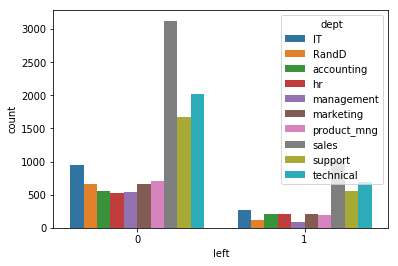

In [9]:
#DISTRIBUTION OF LEFT COLUMN WITH RESPECT TO DEPARTMENT 
sns.countplot(data = data.sort_values(by = "dept"), x = "left", hue = "dept")

In [10]:
#LABEL ENCODING THE DEPARTMENT AND SALARY COLUMNS BASED ON THE MEAN OF LEFT COLUMNS
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
ctg = data[["dept","salary","left"]]
for i in ctg.columns[:-1]:
    ctg_mean = ctg.groupby(i).mean()
    enc = pd.Series(data = lb.fit_transform(ctg_mean), index = ctg_mean.index)
    data[i] = data[i].map(enc)


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#MAKING THE COPY OF THE  DATA
new_data = data.copy()
new_data.columns

Index(['satisfactorylevel', 'lastevaluation', 'numberofprojects',
       'avgmonthlyhours', 'timespent.company', 'workaccident', 'left',
       'promotioninlast5years', 'dept', 'salary'],
      dtype='object')

In [12]:
#Calculating outlier from whole data frame
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3-Q1

((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).sum()

satisfactorylevel           0
lastevaluation              0
numberofprojects            0
avgmonthlyhours             0
timespent.company        1282
workaccident             2169
left                     3571
promotioninlast5years     319
dept                        0
salary                      0
dtype: int64

In [13]:
#Outlier analysis
q75, q25 = np.percentile(new_data["timespent.company"], [75,25])
iqr = q75-q25
minimum = q25-1.5*iqr
maximum = q75+1.5*iqr
new_data.loc[new_data["timespent.company"] < minimum, "timespent.company"] = minimum
new_data.loc[new_data["timespent.company"] > maximum, "timespent.company"]= maximum
        
    
    

{'whiskers': [<matplotlib.lines.Line2D at 0x212837f8da0>,
 'caps': [<matplotlib.lines.Line2D at 0x21283860588>,
 'boxes': [<matplotlib.lines.Line2D at 0x21283853ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x21283860c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x21283860f60>],
 'means': []}

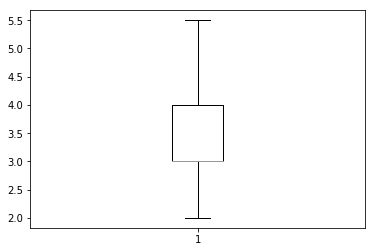

In [14]:
#CHECKING THE COLUMN FOR OUTLIER BY PLOTTING BOXPLOT
plt.boxplot(new_data["timespent.company"])

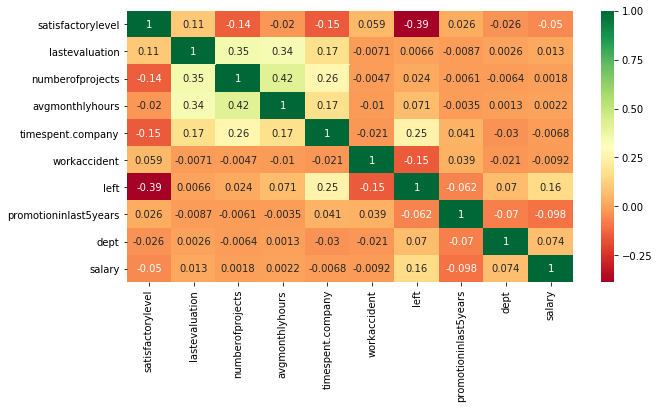

In [15]:
#FINDING CORRELATION WITH DIFFERENT COLUMNS BY USING HEAT MAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(),cmap = "RdYlGn", annot = True)

# PREPARING THE DATA FOR MODEL IMPLEMENTATION

In [16]:
#Selecting Independent Variables
ind_v = new_data[["satisfactorylevel", "timespent.company", "workaccident", "salary"]].values
#Selecting Dependent Variables
dep_v = new_data["left"].values


In [17]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind_v, dep_v, test_size = 0.2, random_state = 0)


In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

# KNN MODEL IMPLEMENTATION

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn_pred = knn.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
print("Confusion_Matrix :\n", confusion_matrix(y_test, knn_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, knn_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, knn_pred))

Confusion_Matrix :
 [[2174   77]
 [  73  676]]


Accuracy:
 0.95


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2251
           1       0.90      0.90      0.90       749

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [22]:
knn.score(x_train, y_train)

0.9573297774814568

In [23]:
#ROC AND AUC CURVE
knn_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, knn_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9687891273956866

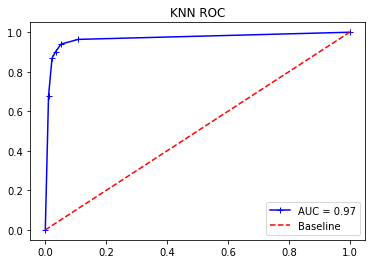

In [24]:
#PLotting roc_curve
plt.title("KNN ROC")
plt.plot(fpr, tpr,"b+-",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# LOGISTIC REGRESSION MODEL

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = "balanced")
lr.fit(x_train, y_train)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [26]:
lr_pred = lr.predict(x_test)

In [27]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, lr_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, lr_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, lr_pred))

Confusion_Matrix :
 [[1743  508]
 [ 169  580]]


Accuracy:
 0.7743333333333333


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      2251
           1       0.53      0.77      0.63       749

   micro avg       0.77      0.77      0.77      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.82      0.77      0.79      3000



In [28]:
#ROC AND AUC CURVE
lr_proba = lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, lr_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8425704878828517

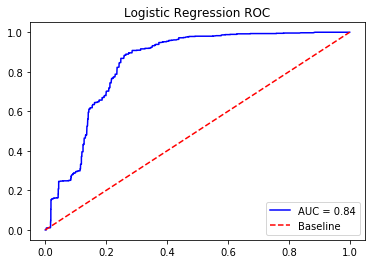

In [29]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Logistic Regression ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

In [30]:
#Finding Threshold Value where "False Positive" is less
threshold_data = pd.DataFrame({"Threshold": threshold, "TPR": tpr, "FPR":fpr})
threshold_data[(threshold_data["TPR"].between(0.95,0.85)) |(threshold_data["FPR"].between(0.25,0.4))]

,Threshold,TPR,FPR
309,0.461354,0.867824,0.250111
310,0.461023,0.867824,0.251444
311,0.459710,0.867824,0.251888
312,0.459379,0.867824,0.253221
313,0.457737,0.867824,0.253665
314,0.456242,0.867824,0.257663
315,0.454601,0.873164,0.258108
316,0.453768,0.881175,0.258996
317,0.452139,0.881175,0.259440
318,0.450966,0.883845,0.259884


In [31]:
#FIXING THE THRESHOLD VALUE FOR PARTICULAR CASE BY USING BINARIZER CALSSIFIER
from sklearn.preprocessing import binarize
lr_pred_class = binarize([lr_proba], threshold = 0.48)[0]
print(confusion_matrix(y_test, lr_pred_class))
accuracy_score(y_test, lr_pred_class)

[[1715  536]
 [ 133  616]]


0.777

# NAIVE BAYES MODEL


In [32]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
gb_pred = gb.predict(x_test)

In [34]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, gb_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, gb_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, gb_pred))

Confusion_Matrix :
 [[2025  226]
 [ 423  326]]


Accuracy:
 0.7836666666666666


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      2251
           1       0.59      0.44      0.50       749

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.71      0.67      0.68      3000
weighted avg       0.77      0.78      0.77      3000



In [35]:
#ROC AND AUC CURVE
gb_proba = gb.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, gb_proba)
auc_score = auc(fpr, tpr)
auc_score

0.837798836179618

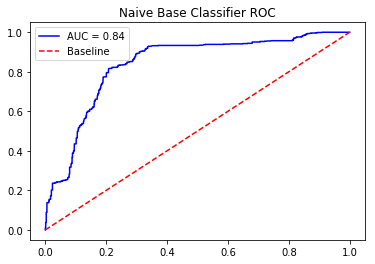

In [36]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Naive Base Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
dtc_pred = dtc.predict(x_test)

In [39]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, dtc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, dtc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, dtc_pred))

Confusion_Matrix :
 [[2196   55]
 [  72  677]]


Accuracy:
 0.9576666666666667


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2251
           1       0.92      0.90      0.91       749

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [40]:
#ROC AND AUC CURVE
dtc_proba = dtc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, dtc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9759901992824432

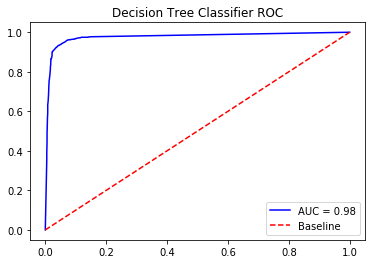

In [41]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Decision Tree Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = "entropy")
rfc.fit(x_train, y_train)


C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rfc_pred = rfc.predict(x_test)

In [44]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, rfc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, rfc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, rfc_pred))

Confusion_Matrix :
 [[2187   64]
 [  64  685]]


Accuracy:
 0.9573333333333334


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2251
           1       0.91      0.91      0.91       749

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [45]:
#ROC AND AUC CURVE
rfc_proba = rfc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9789104264000157

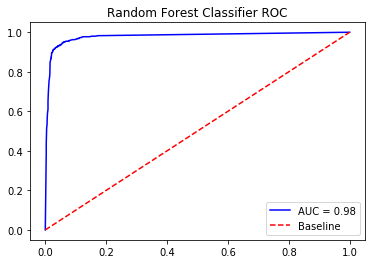

In [46]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Random Forest Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# ADABOOST CLASSIFIER

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [48]:
abc_pred = abc.predict(x_test)

In [49]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, abc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, abc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, abc_pred))

Confusion_Matrix :
 [[2171   80]
 [ 116  633]]


Accuracy:
 0.9346666666666666


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2251
           1       0.89      0.85      0.87       749

   micro avg       0.93      0.93      0.93      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.93      0.93      0.93      3000



In [50]:
#ROC AND AUC CURVE
abc_proba = abc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, abc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.960972693340862

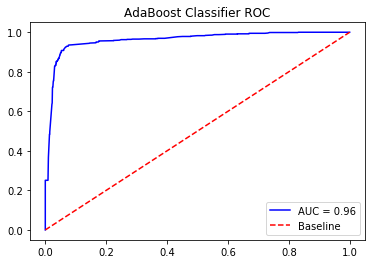

In [51]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("AdaBoost Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# XGBoost CLASSIFIER

In [52]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [53]:
xgb_pred = xgb.predict(x_test)


In [54]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, xgb_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, xgb_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Confusion_Matrix :
 [[2187   64]
 [  71  678]]


Accuracy:
 0.955


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2251
           1       0.91      0.91      0.91       749

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [55]:
#ROC AND AUC CURVE
xgb_proba = xgb.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, xgb_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9775038419358493

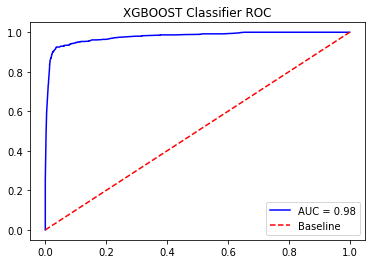

In [56]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("XGBOOST Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# GRADIENT BOOSTING CLASSIFIER

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
gbc_pred = gbc.predict(x_test)

In [59]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, gbc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, gbc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, gbc_pred))

Confusion_Matrix :
 [[2186   65]
 [  71  678]]


Accuracy:
 0.9546666666666667


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2251
           1       0.91      0.91      0.91       749

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [60]:
#ROC AND AUC CURVE
gbc_proba = gbc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, gbc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9760705670643932

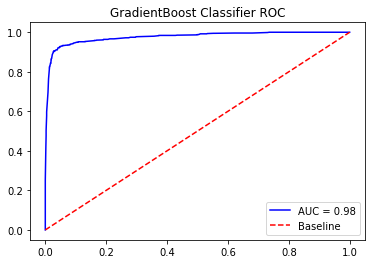

In [61]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("GradientBoost Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# APPLYING K-FOLD CROSS VALIDATION

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
model_list = [knn, lr,gb, dtc, rfc, abc, xgb, gbc] #LIST OF MODEL OBJECTS
#LOOPING THROUGH EACH MODEL FOR CROSS VALIDATION
accuracy = []
for i in model_list:
    accuracies =cross_val_score(estimator = i, X= x_train, y = y_train, cv = 10, scoring = "accuracy")
    accuracies_mean = accuracies.mean()
    accuracy.append(accuracies_mean)

C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KARNDEEP SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

# MODEL AND ACCURACIES ON SINGLE DATAFRAME

In [64]:
model = ["KNearest Neighbors","Logistic Regression","Naive Bayes", "Decision Tree Classifier", "Random Forest Classifier", "AdaBoost Classifier", "XGBBOOST Classifier", "Gradient Boosting Classifier"]

In [65]:
model_accuracy = pd.DataFrame({"Model": model, "Accuracies": accuracy}).sort_values(by = "Accuracies",ascending = False).reset_index().drop("index", axis = 1)

In [66]:
model_accuracy

,Model,Accuracies
0,Random Forest Classifier,0.951996
1,XGBBOOST Classifier,0.950912
2,Decision Tree Classifier,0.950746
3,Gradient Boosting Classifier,0.950246
4,KNearest Neighbors,0.947078
5,AdaBoost Classifier,0.928994
6,Naive Bayes,0.794314
7,Logistic Regression,0.766395


# CONCLUSION 

## 1. BEST MODEL FOR ABOVE DATASET
From Above dataframe i.e model_accuracies we can conclude that "RANDOM FOREST", "XGBBOOST", "DECISION TREE", "GRADIENT BOOSTING" are performing almost equal when accuracy is considered upto 2 decimal. But, Selectively we can choose "RANDOM FOREST MODEL" to classify the given problem because it evident that accuracy of "RANDOM FOREST" is more than all above mentioned algorithms and is more efficient than others as other Algorithm consumes more Resources.

## 2. COMMENTS ON ACCURACY A GOOD MEASURE OR NOT?
   Accuracy can be misleading. For example, in a problem where there is a large class imbalance, a model can predict the value of the majority class for all predictions and achieve a high classification accuracy. In such case, we need to go for different measures techniques that are as follows:
   
**1.ROC CURVE:**
From ROC curve we can find a perfect **THRESHOLD** where over **FALSE POSITIVE RATE** is minimum and **TRUE POSITIVE RATE** is maximum.Therefore, Accuracy could decrease or increase it depends upon cases after fixing the **Perfect THRESHOLD**.Hence, from here we can say that not always **Accuracy** is considered to be best estimator of a model therefore,other parameters are required to draw conclusion about **EVALUATION OF MODEL PERFORMANCE**. 

**2. PRECISION AND RECALL CURVE:**
It Summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. Here, we determine **THRESHOLD** based on **PRECISION AND RECALL**. Genearally, if dataset is balanced **PRECISION AND RECALL VALUES** are high and when dataset is imbalanced **PRECISION AND RECALL** would be low hence we need to consider next parameter i.e **F1-SCORE** or else we can change the THRESHOLD value according to the case and opt the best acuracy depending upon **PRECISION AND RECALL**.



# Further Conclusion:
ACCURACY can be misleading if the number of samples per class in your problem is unbalanced. Having a dataset with two classes only, where the first class is 90% of the data, and the second completes the remaining 10%. If the classifier predicts every sample as belonging to the first class, the accuracy reported will be of 90% but this classifier is in practice useless.

With imbalanced classes, it’s easy to get a high accuracy without actually making useful predictions. So, accuracy as an evaluation metrics makes sense only if the class labels are uniformly distributed.



**ROC Curves**: summarise the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

**Precision-Recall curves**: summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.